In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iphone-customer-reviews-nlp/iphone.csv


**Initiaizing import**

In [2]:
import pandas as pd 
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.decomposition import LatentDirichletAllocation
import nltk

# Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
data = pd.read_csv('/kaggle/input/iphone-customer-reviews-nlp/iphone.csv')
data

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [4]:
def data_summary(data):
    info = data.info()
    description = data.describe()
    
    return info,description

info,description = data_summary(data)
print(info)
print(description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB
None
       ratingScore
count  3062.000000
mean      3.758981
std       1.579033
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       5.000000


In [5]:
def null_values(data):
    null = data.isnull()
    sum_of_null_values = null.sum()
    return null,sum_of_null_values

print(null_values(data))

(      productAsin  country   date  isVerified  ratingScore  reviewTitle  \
0           False    False  False       False        False        False   
1           False    False  False       False        False        False   
2           False    False  False       False        False        False   
3           False    False  False       False        False        False   
4           False    False  False       False        False        False   
...           ...      ...    ...         ...          ...          ...   
3057        False    False  False       False        False        False   
3058        False    False  False       False        False        False   
3059        False    False  False       False        False        False   
3060        False    False  False       False        False        False   
3061        False    False  False       False        False        False   

      reviewDescription  reviewUrl  reviewedIn  variant  variantAsin  
0                 False    

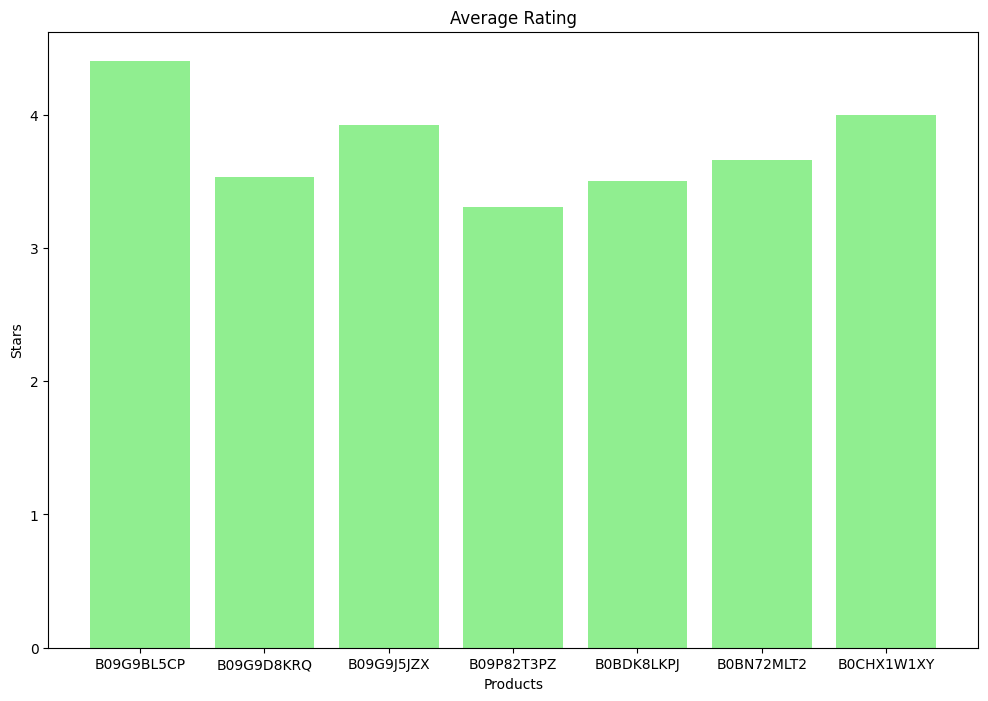

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


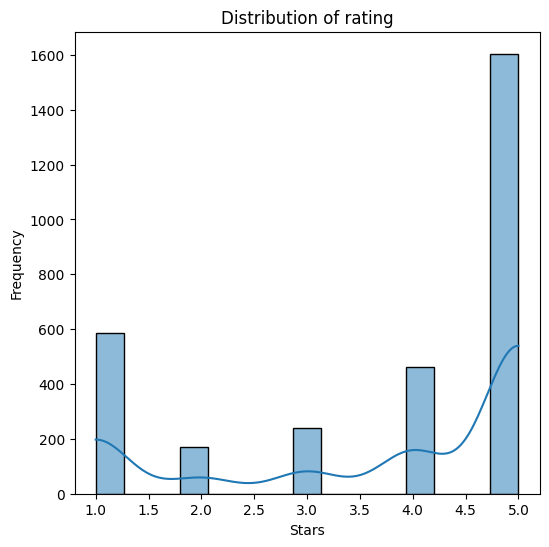

In [6]:
def bar_chart(df):
    plt.figure(figsize=(12,8 ))
    average_price_by_make = df.groupby('productAsin')['ratingScore'].mean()
    plt.bar(average_price_by_make.index, average_price_by_make.values,color='lightgreen')
    plt.title('Average Rating')
    plt.xlabel('Products')
    plt.ylabel('Stars')
    plt.show()
    
def histplot(df):
    plt.figure(figsize=(6, 6))
    sns.histplot(df['ratingScore'], kde=True)
    plt.title('Distribution of rating')
    plt.xlabel('Stars')
    plt.ylabel('Frequency')
    plt.show()

        

    
bar_chart(data)
histplot(data)


In [7]:
stop_words = set(stopwords.words('english'))

#cleaning data

def clean_text(text):
    #start by converting text to string to carry out operations
    text = str(text).lower() #converting string to lower letters
    text = re.sub(r'\W',' ',text) #removing special characters 
    text = re.sub(r'\s',' ',text) #removing extra spaces
    return text.strip()

data['cleaned_review'] = data['reviewDescription'].apply(clean_text)

In [8]:
#preprocessing the text 
def preprocessing_text(text):
    words = word_tokenize(text)  #tokenizing the text
    words = [word for word in words if word not in stop_words]  #removing stop words
    return ' '.join(words)

data['preprocessed_review'] = data['cleaned_review'].apply(preprocessing_text)

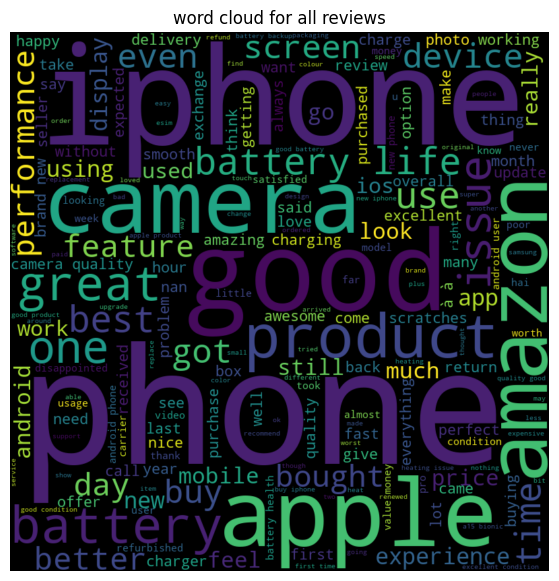

In [9]:
def review_word_cloud_plot(data):
    all_text = ' '.join(review for review in data['preprocessed_review'])
    word_cloud = WordCloud(width=800,height=800,random_state=42).generate(all_text)
    plt.figure(figsize=(12,7))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.title('word cloud for all reviews')
    plt.show()
    
review_word_cloud_plot(data)

**Sentiment Analysis**

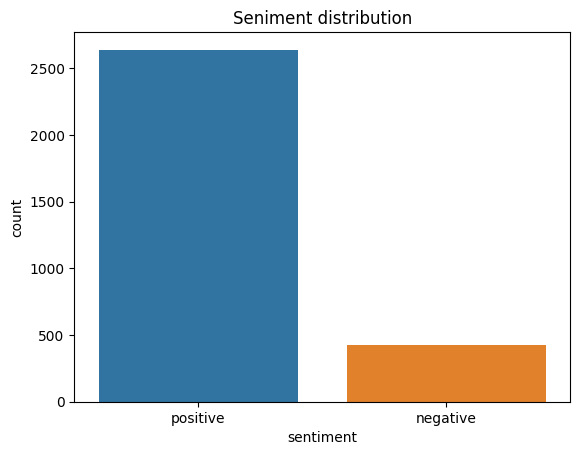

In [10]:
sentiment_analyzer = SentimentIntensityAnalyzer()

data['sentiment_score'] = data['preprocessed_review'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x>=0 else 'negative')

sns.countplot(x='sentiment',data=data)
plt.title('Seniment distribution')
plt.show()

In [11]:
data['sentiment_label'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


**Splitting data**
training data and testing data

In [12]:
def split_data(X,y,test_size,random_state):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=random_state)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = split_data(data['preprocessed_review'],data['sentiment_label'],0.25,42)

In [13]:
def tfidfvectorize(X_train,X_test):
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(X_train)
    X_test = tfidf.transform(X_test)
    return X_train,X_test

X_train,X_test = tfidfvectorize(X_train,X_test)

In [14]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12287 stored elements and shape (766, 5000)>
  Coords	Values
  (0, 4941)	0.23416579710822172
  (0, 4339)	0.23135523661637755
  (0, 4201)	0.22629103035591028
  (0, 4018)	0.19250069408826267
  (0, 3899)	0.20373663772208328
  (0, 3818)	0.18624000969925578
  (0, 3753)	0.17254850234170702
  (0, 3320)	0.16238438978550626
  (0, 3280)	0.1607858111965041
  (0, 3277)	0.24811183703964076
  (0, 2867)	0.27886653671773454
  (0, 2569)	0.1226511821273864
  (0, 2053)	0.26348918687868766
  (0, 2046)	0.20644673401968172
  (0, 1629)	0.17197818766740577
  (0, 1353)	0.22873866739737528
  (0, 824)	0.14192171243460866
  (0, 789)	0.24050135854257818
  (0, 554)	0.1682094656155208
  (0, 531)	0.13622222815184304
  (0, 464)	0.14512856922988362
  (0, 384)	0.10147170867053064
  (0, 136)	0.2897769400595998
  (0, 38)	0.1768005745465264
  (0, 5)	0.15954225024236404
  :	:
  (763, 2146)	0.18399445850927237
  (763, 1889)	0.07896619756980822
  (763, 1690)	0.2194

training model LogisticRegression()
accuracy on training data using LogisticRegression() is 0.894163763066202

precision score on training data using LogisticRegression()is 0.8899954730647351

classification report of training data using LogisticRegression() is               precision    recall  f1-score   support

           0       1.00      0.26      0.42       330
           1       0.89      1.00      0.94      1966

    accuracy                           0.89      2296
   macro avg       0.94      0.63      0.68      2296
weighted avg       0.91      0.89      0.87      2296

confusion matrix of training data using LogisticRegression() is [[  87  243]
 [   0 1966]]


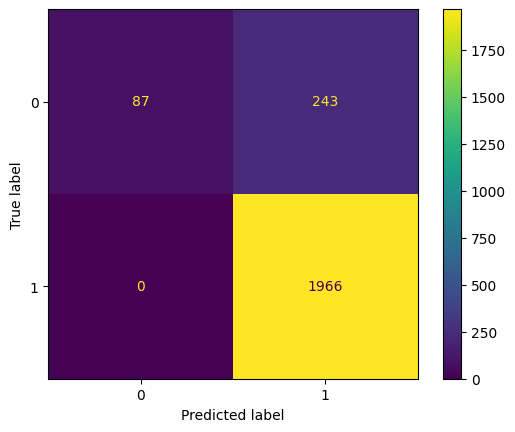

----------------------------------------------------------------------------------
accuracy on testing data using LogisticRegression() is 0.891644908616188

precision score on testing data using LogisticRegression() is 0.8911022576361222

classification report of testing data using LogisticRegression() is               precision    recall  f1-score   support

           0       0.92      0.13      0.22        94
           1       0.89      1.00      0.94       672

    accuracy                           0.89       766
   macro avg       0.91      0.56      0.58       766
weighted avg       0.90      0.89      0.85       766

confusion matrix of testing data using LogisticRegression() is [[ 12  82]
 [  1 671]]


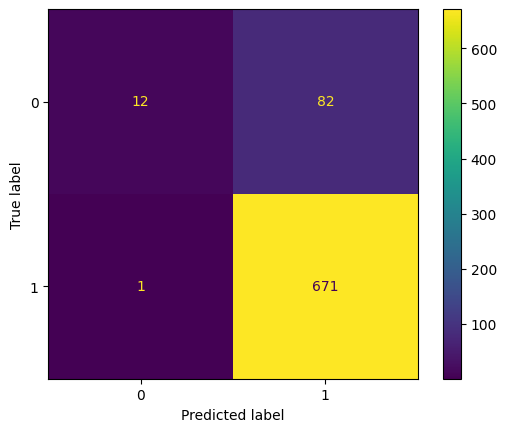

In [15]:
model = LogisticRegression()

model.fit(X_train,y_train)
print(f"training model {model}") 
train_predict = model.predict(X_train)
train_accuracy_score = accuracy_score(y_train,train_predict)
print(f"accuracy on training data using {model} is {train_accuracy_score}")
print()
train_precision_score = precision_score(y_train,train_predict)
print(f"precision score on training data using {model}is {train_precision_score}")
print()
train_classification_report = classification_report(y_train,train_predict)
print(f"classification report of training data using {model} is {train_classification_report}")
train_confusion_matrix = confusion_matrix(y_train,train_predict)
print(f"confusion matrix of training data using {model} is {train_confusion_matrix}")
cm = ConfusionMatrixDisplay(train_confusion_matrix,display_labels=model.classes_)
cm.plot()
plt.show()


print("----------------------------------------------------------------------------------")

test_pred = model.predict(X_test)
test_accuracy_score = accuracy_score(y_test,test_pred)
print(f"accuracy on testing data using {model} is {test_accuracy_score}")
print()
test_precision_score = precision_score(y_test,test_pred)
print(f"precision score on testing data using {model} is {test_precision_score}")
print()
test_classification_report = classification_report(y_test,test_pred)
print(f"classification report of testing data using {model} is {test_classification_report}")
test_confusion_matrix = confusion_matrix(y_test,test_pred)
print(f"confusion matrix of testing data using {model} is {test_confusion_matrix}")
test_cm = ConfusionMatrixDisplay(test_confusion_matrix,display_labels=model.classes_)
test_cm.plot()
plt.show()



Top 10 words in positive reviews:
[('phone', 1363), ('iphone', 1068), ('good', 918), ('battery', 679), ('camera', 573), ('apple', 444), ('product', 421), ('like', 388), ('13', 375), ('new', 353)]

Top 10 words in negative reviews:
[('phone', 292), ('iphone', 142), ('battery', 124), ('apple', 95), ('product', 89), ('amazon', 87), ('buy', 67), ('camera', 66), ('service', 64), ('working', 60)]


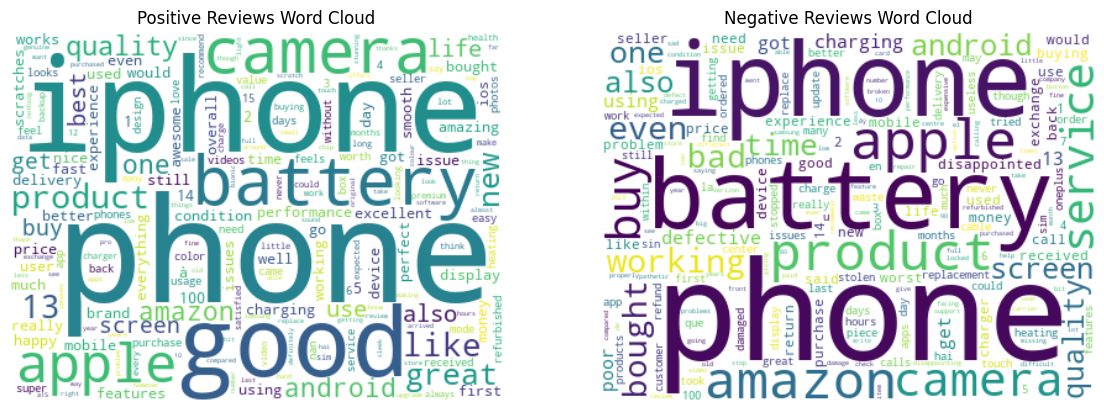

In [16]:
positive_reviews = data[data['sentiment'] == 'positive']['preprocessed_review']
negative_reviews = data[data['sentiment'] == 'negative']['preprocessed_review']

# Count words in positive reviews
positive_words = ' '.join(positive_reviews).split()
positive_word_counts = Counter(positive_words)

# Count words in negative reviews
negative_words = ' '.join(negative_reviews).split()
negative_word_counts = Counter(negative_words)

# Display top words for positive and negative sentiments
print("Top 10 words in positive reviews:")
print(positive_word_counts.most_common(10))

print("\nTop 10 words in negative reviews:")
print(negative_word_counts.most_common(10))

# Word Clouds for Positive and Negative Reviews
def pos_neg_review_plot(df,positive_word_counts,negative_word_counts):
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    positive_wc = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(positive_word_counts)
    negative_wc = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(negative_word_counts)

    ax[0].imshow(positive_wc, interpolation='bilinear')
    ax[0].axis('off')
    ax[0].set_title('Positive Reviews Word Cloud')

    ax[1].imshow(negative_wc, interpolation='bilinear')
    ax[1].axis('off')
    ax[1].set_title('Negative Reviews Word Cloud')

    plt.show()
    
pos_neg_review_plot(data,positive_word_counts,negative_word_counts)

In [17]:
features = ['battery', 'camera', 'screen', 'price', 'performance']

# Create a dictionary to store sentiments for each feature
feature_sentiment = {feature: [] for feature in features}

# Populate the dictionary with sentiment scores based on keyword mentions
for index, row in data.iterrows():
    for feature in features:
        if feature in row['preprocessed_review']:
            feature_sentiment[feature].append(row['sentiment_score'])

# Average sentiment score for each feature
feature_sentiment_avg = {feature: (sum(scores) / len(scores)) if scores else 0 for feature, scores in feature_sentiment.items()}

# Display feature sentiment
print("Average sentiment score for each feature:")
for feature, score in feature_sentiment_avg.items():
    print(f"{feature}: {score:.2f}")

Average sentiment score for each feature:
battery: 0.54
camera: 0.65
screen: 0.55
price: 0.59
performance: 0.70


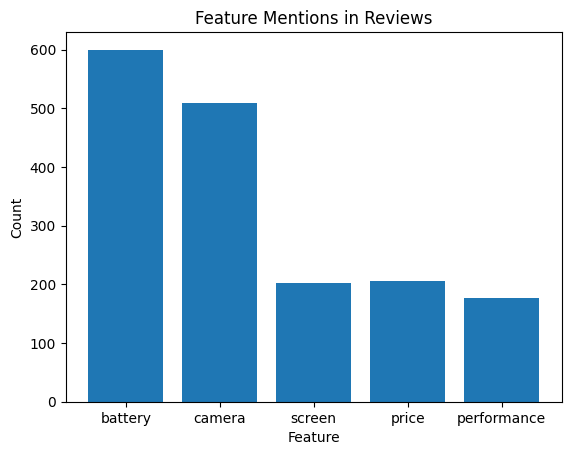

In [18]:
# Identify key features
features = ['battery', 'camera', 'screen', 'price', 'performance']

# Count occurrences of each feature
feature_counts = {feature: data['preprocessed_review'].str.contains(feature).sum() for feature in features}

# Plot feature mentions
plt.bar(feature_counts.keys(), feature_counts.values())
plt.title('Feature Mentions in Reviews')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()